# <font color='blue'> <center> Economic and Population Indicators <br> for Number of Cars Owned by Citizens</center></font>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## <font color="blue">Introduction</blue>

In this project I study why in some countries in the world people own more 4-wheel vehicles than in others.

**1. Does the number of 4-wheel vehicles owned per 1000 persons depends on the GDP per capita of a country?**\
**2. Does the number of 4-wheel vehicles per 1000 persons depends on the energy production per capita of a country?**\
**3. Does the number of 4-wheel vehicles 1000 persons depends on the energy use per capita of a country?**\
**4. Does the number of 4-wheel vehicles per 1000 persons depends on rural population in a country?**\
**5. Does the number of 4-wheel vehicles per 1000 persons depends on the average number of babies per woman in a country?**


Further I am interested if the countries which have more cars per capita, have also higher CO2 emission or if CO2 emissions are more related to energy parameters - like energy production and use.

**7. Do CO2 emissions for a country depend on car owned per 1000 persons?**\
**8. Is there any energy parameter related to the CO2 emissions?**


In the second part of this project I test my most important conclusions on the local sample of countries - Middle Europe countries.


### Data sets used in this project

#### Income per person (GDP per capita) \[PPP\$ inflation-adjusted\]
fileName: income_per_person_gdppercapita_ppp_inflation_adjusted.csv\
description: Gross domestic product per person adjusted for differences in purchasing power
(in international dollars, fixed 2011 prices, PPP based on 2011 ICP)\
sourceName: Gapminder based on World Bank, A. Maddison, M. Lindgren, IMF&more\
sourceLink: http://gapm.io/dgdppc

#### Energy production per person \[tonnes oil equivalent\]
fileName: energy_production_per_person.csv\
description: Energy production refers to forms of primary energy -- petroleum (crude oil,
natural gas liquids, and oil from nonconventional sources), natural gas, solid fuels (
coal lignite, and other derived fuels), and combustible renewables and waste --  and primary
electricity, all converted into tonnes of oil equivalents, calculated by dividing with the population
of each country during the given year, counted in tonnes of oil equivalent (toe) \
sourceLink:https://data.worldbank.org/indicator/EG.EGY.PROD.KT.OE


#### Energy use per person \[kg of oil equivalent \]
fileName: energy_use_per_person.csv\
description: Energy use refers to use of primary energy before transformation to other end-use
fuels, which is equal to indigenous production plus imports and stock changes, minus
exports and fuels supplied to ships and aircraft engaged in international transport\
sourceLink: https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE

 
#### CO2 emissions \[tonnes per person\]
fileName: co2_emissions_tonnes_per_person.csv\
description: CO2 dioxide emissions from the burning of fossil fuels (metric tonnes of CO2 per person) \
sourceLink: https://cdiac.ess-dive.lbl.gov/


#### Cars, trucks&buses \[number per 1000 persons\]
fileName: cars_trucks_and_buses_per_1000_persons.csv\
description: Registred four-wheel motor vehicles per 1000 population. Cars, buses, and freight vehicles but not
two-wheelers \
sourceLink: https://data.worldbank.org/indicator/IS.VEH.NVEH.P3

#### Country and Continent Codes List
fileName: country-and-continent-codes-list-csv_csv.csv\
sourceLink: https://datahub.io/JohnSnowLabs/country-and-continent-codes-list

#### Population density \[per sq. km of land area\]
fileName: population_density_per_square_km.csv\
description: Average number of people on each square km of the land in the given country
sourceLink: https://population.un.org/wpp/

#### Rural population \[\% of total population\]
fileName: sp_rur_totl_zs.csv\
sourceName: World Bank staff estimates based on the United Nations Population Division's World Urbanization Prospects: 2018 Revision

#### Babies per woman
fileName: children_per_woman_total_fertility.csv\
description: Total fertility rate. The number of children that would be born to each woman with prevailing age-specific fertility rates \
sourceLink: http://gapm.io/dtfr

### Loading of all modules

I will be working with these modules in Python:

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## <font color="blue">Data Wrangling</font>



### Loading datasets
I am interested about the data from in the years 1990-2009 in this report. The dataset 'energy_production_per_person' comprises comprehensive data only to the year 2009.

In [329]:
df_cars=pd.read_csv('cars_trucks_and_buses_per_1000_persons.csv')
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  157 non-null    object 
 1   2002     80 non-null     float64
 2   2003     75 non-null     float64
 3   2004     62 non-null     float64
 4   2005     50 non-null     float64
 5   2006     37 non-null     float64
 6   2007     145 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB


Dataset \"cars\" comprises comprehensive data for the year 2007. It contains information about cars owned per 1000 persons in 145 countries

In [330]:
cars=df_cars.iloc[:, np.r_[0,-1]]

In [331]:
df=pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income=df.iloc[:,np.r_[0,191:211]]

In [332]:
df_Eprod=pd.read_csv('energy_production_per_person.csv')
Eprod=df_Eprod.iloc[:,np.r_[0,31:51]]

In [333]:
df_Euse=pd.read_csv('energy_use_per_person.csv')
Euse=df_Euse.iloc[:,np.r_[0,31:51]]

In [334]:
df_CO2=pd.read_csv('co2_emissions_tonnes_per_person.csv')
CO2=df_CO2.iloc[:, np.r_[0,191:211]]

Loading population density dataset

In [335]:
df_popDensity=pd.read_csv('population_density_per_square_km.csv')
df_popDensity[['country','2007']].isnull().any()

country    False
2007       False
dtype: bool

Country population density dataframe for the year 2007

In [336]:
popDensity=df_popDensity[['country','2007']]

Loading rural population dataset

In [337]:
df_rural=pd.read_csv('sp_rur_totl_zs.csv')
df_rural[['country','2007']].isnull().any()

country    False
2007       False
dtype: bool

Country rural population for the year 2007

In [338]:
rural=df_rural[['country','2007']]

Loading fertility rate dataset

In [339]:
df_fertility=pd.read_csv('children_per_woman_total_fertility.csv')
df_fertility[['country','2007']].isnull().any()
fertility=df_fertility[['country','2007']]

### Data Cleaning 

#### Check the NaN values in all datasets and get rid of them


In this project we are mainly interested about the cars owned per 1000 persons in different countries. 
First drop the missing values and reset the indeces in the "cars" dataset (which contains information for year 2007).

In [340]:
cars.dropna(axis=0, inplace=True)
cars=cars.reset_index(drop=True)
cars.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,2007
0,Afghanistan,22.8
1,Albania,102.0
2,Angola,39.6
3,Argentina,314.0
4,Armenia,105.0


Dropping all NaN values from dataframe "df_cars", which contains information about cars owned in the years 2002-2007

In [341]:
df_cars_drop=df_cars.dropna(axis=0)
df_cars_drop=df_cars.reset_index(drop=True)
df_cars_drop.head()

,country,2002,2003,2004,2005,2006,2007
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,22.8
1,Albania,73.0,NaN,85.0,87.5,97.3,102.0
2,Algeria,NaN,88.0,89.0,91.0,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,39.6
4,Argentina,NaN,NaN,NaN,NaN,NaN,314.0


Checking the other datasets and dropping NaN values

In [342]:
income.columns[income.isnull().any()]
Eprod.columns[Eprod.isnull().any()]

Index(['1990', '1991', '1992', '1993', '1994'], dtype='object')

In [343]:
Eprod.isnull().any(axis=1).sum()

3

Check where in the "Eprod" dataset are NaN values. 

In [344]:
Eprod[Eprod.isnull().any(axis=1)]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
19,Cambodia,NaN,NaN,NaN,NaN,NaN,0.00026,0.00026,0.00026,0.00026,...,0.00026,0.00026,0.00026,0.00026,0.00026,0.00026,0.00026,0.00026,0.00026,0.00026
38,Eritrea,NaN,NaN,0.00022,0.00022,0.00022,0.00023,0.00023,0.00023,0.00014,...,0.00014,0.00014,0.00014,0.00014,0.00011,0.00011,0.00011,0.00011,0.00011,0.00011
80,Namibia,NaN,0.00015,0.00014,0.00013,0.00012,0.00015,0.00014,0.00012,0.00014,...,0.00015,0.00015,0.00015,0.00016,0.00016,0.00016,0.00015,0.00015,0.00015,0.00015


Since Cambodgia's and Eritrea's energy production shows quite steady I can approximate:

In [345]:
Eprod.iloc[19,1:6] = Eprod.iloc[19,6]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [346]:
Eprod.iloc[38,1:3] = Eprod.iloc[38,3]

I am particularly interested in the year **2007**, since I have the most values from the dataset "cars" in the year 2007. I check  if there are missing values in the column "2007" of other datasets:

In [347]:
Eprod['2007'].isnull().any()

False

In [348]:
Euse['2007'].isnull().any()

True

I will delete all rows which are NaN in "Euse" in column "2007"

In [349]:
i=Euse[Euse['2007'].isnull()].index
Euse.drop(i, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


I continue the same process with all datasets:

In [350]:
CO2['2007'].isnull().any()

False

Categorizing the income. (Ordinal) Categories of income are "high", "average", "low" and "very low" base don quartiles of the income in 2007.

In [351]:
Q1=income['2007'].quantile(0.25)
Q2=income['2007'].quantile(0.5)
Q3=income['2007'].quantile(0.75)
bin_edges=[0, Q2,Q3, max(income['2007'])]
bin_names=['low','average','high']
income['incomeCateg_2007']=pd.cut(income['2007'],bin_edges,labels=bin_names)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Merging of the dataframe "cars" into the dataframe "income" 

In [352]:
df_2007=pd.merge(cars,income, on="country")

Locating the year 2007 for each variable and renaming appropriately

In [353]:
df_2007=df_2007.loc[:,['country','2007_x','2007_y','incomeCateg_2007']]

In [354]:
df_2007=df_2007.rename(columns={'2007_x':'carsOwnby1000','2007_y':'income', 'incomeCateg_2007':'incomeCat'})
df_2007=df_2007[['country','income','incomeCat','carsOwnby1000']]

The new dataframe "df_2007" consists of merged dataframes

Merging all other datasets with a new dataframe "df_2007". First I choose the country and "2007" column.

In [355]:
Euse_2007=Euse.loc[:,['country','2007']]
Eprod_2007=Eprod.loc[:,['country','2007']]
CO2_2007=CO2.loc[:,['country','2007']]

In [356]:
df_2007=pd.merge(Euse_2007,df_2007, on="country")

In [357]:
df_2007=df_2007.rename(columns={'2007':'Euse'})

In [358]:
df_2007=pd.merge(Eprod_2007,df_2007, on="country")
df_2007=df_2007.rename(columns={'2007':'Eprod'})

In [359]:
df_2007=pd.merge(CO2_2007,df_2007, on="country")
df_2007=df_2007.rename(columns={'2007':'CO2'})

Merging population in 2007 to the dataframe "df_2007"

In [360]:
df_2007=pd.merge(popDensity,df_2007, on="country")
df_2007=df_2007.rename(columns={'2007':'popDensity'})

In [361]:
df_2007=pd.merge(rural,df_2007, on="country")
df_2007=df_2007.rename(columns={'2007':'rural [%]'})

In [362]:
df_2007=pd.merge(fertility,df_2007, on="country")
df_2007=df_2007.rename(columns={'2007':'fertility'})

In [363]:
df_2007.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   country        113 non-null    object  
 1   fertility      113 non-null    float64 
 2   rural [%]      113 non-null    float64 
 3   popDensity     113 non-null    float64 
 4   CO2            113 non-null    float64 
 5   Eprod          113 non-null    float64 
 6   Euse           113 non-null    float64 
 7   income         113 non-null    int64   
 8   incomeCat      113 non-null    category
 9   carsOwnby1000  113 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(1)
memory usage: 9.0+ KB


Renaming the columns of "df_2007", adding units

In [364]:
df_2007=df_2007.rename(columns={'fertility':'fertilityRate','CO2':'CO2 [t PP]','income':'income [$PPP PP]','Eprod':'Eprod [toe PP]','Euse':'Euse [kgoe PP]'})

Including the continent names and codes to the dataframe "df_2007"

In [365]:
continent=pd.read_csv('country-and-continent-codes-list-csv_csv.csv')
continent.head()
continent=continent.loc[:,['Country_Name','Three_Letter_Country_Code','Continent_Name','Continent_Code',]]
continent.head()
continent=continent.rename(columns={'Country_Name':'country','Three_Letter_Country_Code':'countryCode'})

If "NA" values for the continent code are interpreted as NaN

In [366]:
continent['Continent_Code']=continent['Continent_Code'].fillna("NA")

In [367]:
df_2007.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country           113 non-null    object  
 1   fertilityRate     113 non-null    float64 
 2   rural [%]         113 non-null    float64 
 3   popDensity        113 non-null    float64 
 4   CO2 [t PP]        113 non-null    float64 
 5   Eprod [toe PP]    113 non-null    float64 
 6   Euse [kgoe PP]    113 non-null    float64 
 7   income [$PPP PP]  113 non-null    int64   
 8   incomeCat         113 non-null    category
 9   carsOwnby1000     113 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(1)
memory usage: 9.0+ KB


Some of the countries belongs to the more continents, therefore I join them to the one row. I join the continent name and continent code to the one row divided by a comma


In [368]:
continent['Continent_Code']=continent.groupby('country')['Continent_Code'].transform(','.join)
continent['Continent_Name']=continent.groupby('country')['Continent_Name'].transform(','.join)


And lastly I drop duplicates

In [369]:
continent=continent.drop_duplicates('country')

Merging "continent" dataframe with the "df_2007" dataframe based on country

In [370]:
df_2007=pd.merge(continent,df_2007, on="country")

Renaming same Continent_Name and Continent_Code with caps down. 

In [371]:
df_2007=df_2007.rename(columns={'Continent_Name':'continent', 'Continent_Code':'continentCode'})

Makin the catogories for countries based on population: "small", "medium", "large", "huge". Where the category "small" cointains countries from the first quantile, "medium" from the second quantile...etc.

In [372]:
df_2007.head(10)
Qp2=df_2007['popDensity'].median()
Qp1=df_2007['popDensity'].quantile(0.25)
Qp3=df_2007['popDensity'].quantile(0.75)


bins_p=[df_2007['popDensity'].min()-1,Qp1,Qp2,Qp3,df_2007['popDensity'].max()+1]
values_p=["small", "medium", "large", "huge"]
df_2007['popDensCat']=pd.cut(df_2007['popDensity'],bins_p,labels=values_p)

In [373]:
df_2007=df_2007[['country','countryCode','continent','continentCode','popDensity','popDensCat', 'rural [%]','fertilityRate','carsOwnby1000','income [$PPP PP]','incomeCat','Eprod [toe PP]','Euse [kgoe PP]','CO2 [t PP]']]

In [374]:
df_2007.groupby('continentCode')['country'].count()

continentCode
AF       21
AS       24
EU       33
EU,AS     6
NA       12
OC        2
SA        9
Name: country, dtype: int64

In [375]:
df_2007.continent.unique()

array(['Europe', 'Africa', 'South America', 'Oceania', 'Asia',
       'Europe,Asia', 'North America'], dtype=object)

In [376]:
import random
random.seed(42)
df_NA=df_2007.query('continent=="North America"').sample(n=4)
df_EU=df_2007.query('continent=="Europe"').sample(n=4)
df_AF=df_2007.query('continent=="Africa"').sample(n=3)
df_SA=df_2007.query('continent=="South America"').sample(n=4)
df_OC=df_2007.query('continentCode=="OC"')
df_EU_AS=df_2007.query('continentCode=="EU,AS"').sample(n=2)

In [377]:
df_2007_sample=pd.concat([df_NA, df_EU,df_AF,df_SA,df_EU_AS,df_OC], ignore_index=True, sort=False)


In [378]:
df_2007_sample

,country,countryCode,continent,continentCode,popDensity,popDensCat,rural [%],fertilityRate,carsOwnby1000,income [$PPP PP],incomeCat,Eprod [toe PP],Euse [kgoe PP],CO2 [t PP]
0,United States,USA,North America,NA,32.90,medium,19.70,2.12,820.0,50900,high,0.00552,7760.0,20.400
1,El Salvador,SLV,North America,NA,295.00,huge,37.20,2.41,83.7,6200,low,0.00048,733.0,1.120
2,Panama,PAN,North America,NA,46.50,medium,35.70,2.64,188.0,14000,average,0.00021,883.0,2.090
3,Costa Rica,CRI,North America,NA,86.30,large,31.80,2.01,152.0,12300,average,0.00062,1020.0,1.790
4,Ireland,IRL,Europe,EU,62.80,medium,39.10,1.99,537.0,48700,high,0.00033,3420.0,11.000
5,France,FRA,Europe,EU,113.00,large,22.40,1.97,601.0,37700,high,0.00219,4120.0,6.560
6,United Kingdom,GBR,Europe,EU,254.00,huge,19.50,1.84,527.0,38500,high,0.00290,3440.0,9.100
7,Finland,FIN,Europe,EU,17.40,small,16.80,1.83,559.0,42500,high,0.00305,6970.0,12.600
8,Sudan,SDN,Africa,AF,18.30,small,67.10,5.03,28.0,3190,low,0.00087,366.0,0.399
9,Tanzania,TZA,Africa,AF,45.90,medium,73.90,5.58,11.7,2050,low,0.00041,455.0,0.140


<a id='eda'></a>
## <font color="blue"> Exploratory Data Analysis </font>


###  Is there any correlation between the number of cars owned per 1000 citizens and some of the chosen economic/energy parameters? 

Please note that the year 2007 is only present in the dataframe "cars"

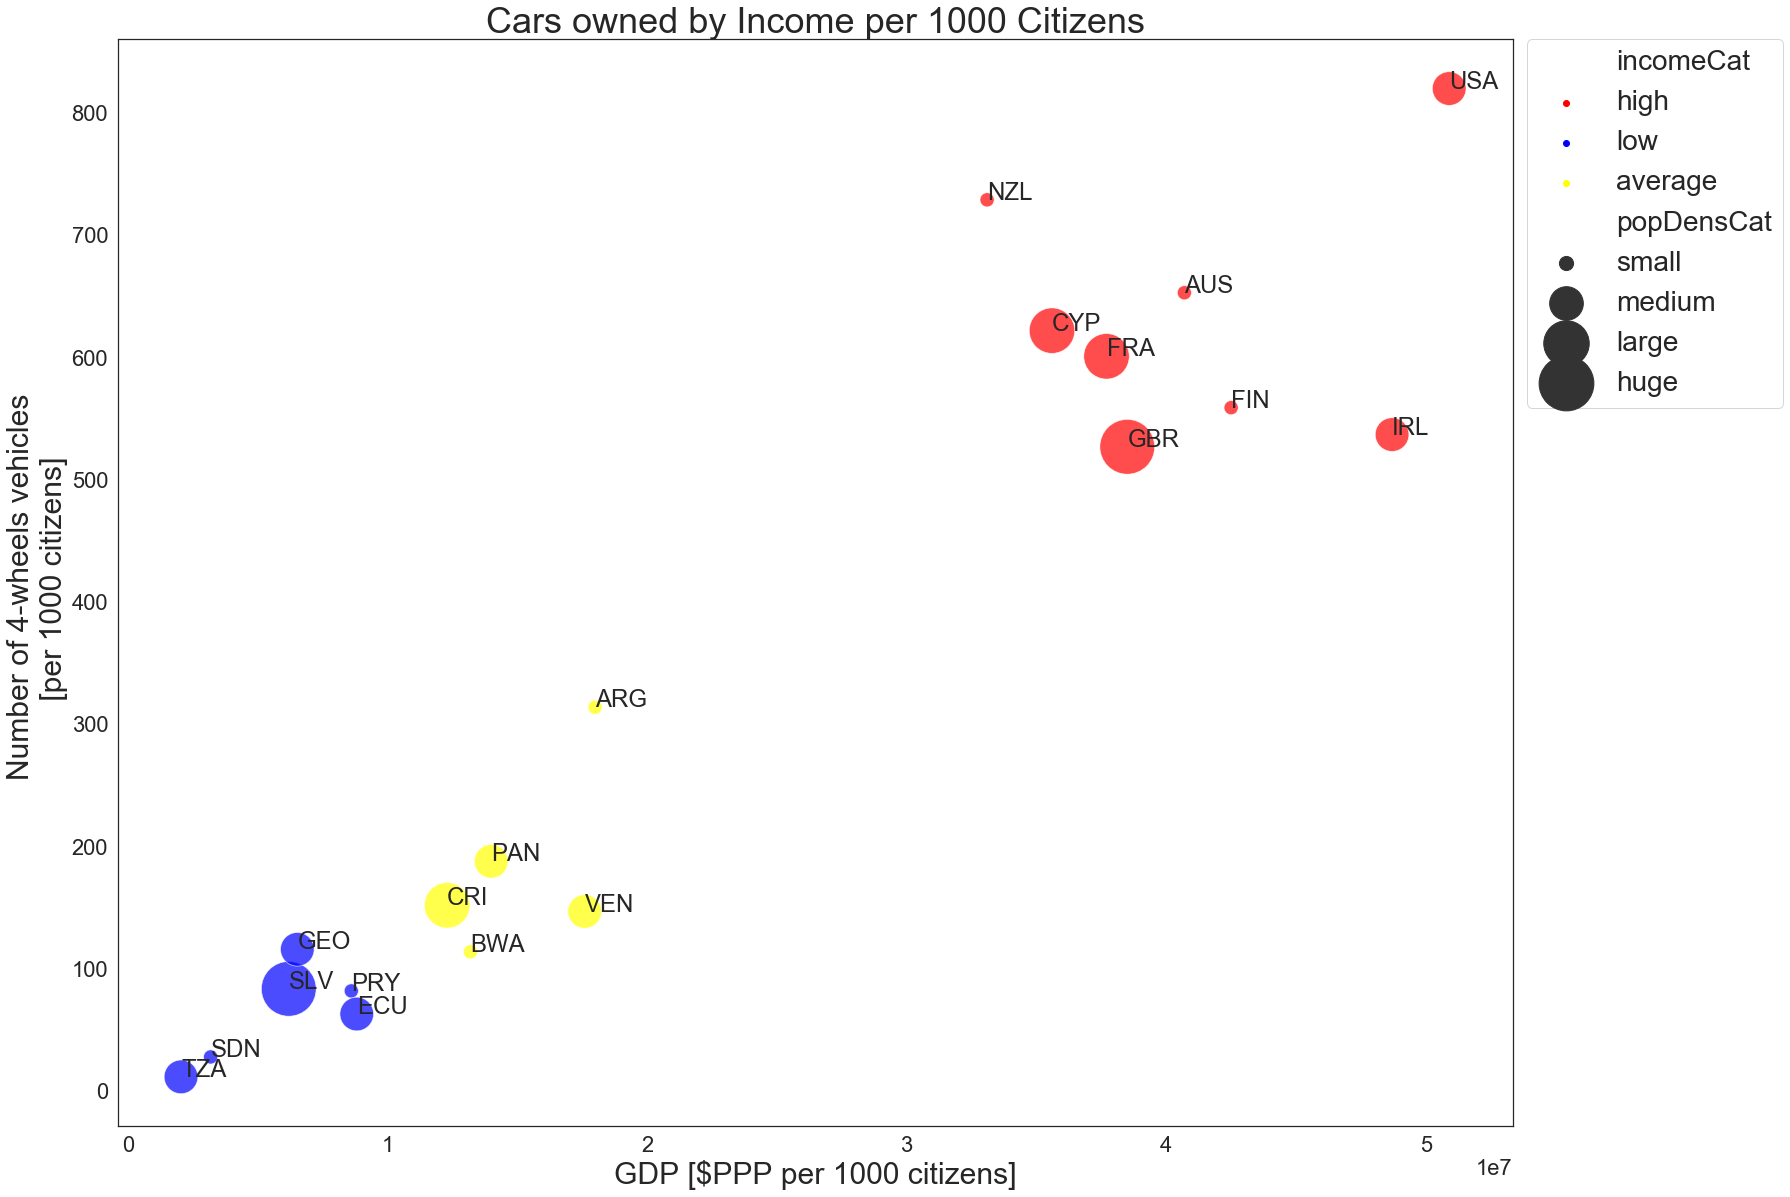

In [391]:
sns.set_context("talk", font_scale=1.1)

sns.set(font_scale=2,style="white")

plt.figure(figsize=(25,20))
x_01=df_2007_sample['income [$PPP PP]']*1000
sns.scatterplot(x_01, y='carsOwnby1000', alpha=0.7,hue="incomeCat", palette=['red','blue','yellow'],
                size='popDensCat',sizes=(3000,200),data=df_2007_sample);
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=28)
plt.xlabel("GDP [$PPP per 1000 citizens]", size=30)
plt.ylabel("Number of 4-wheels vehicles \n [per 1000 citizens]", size=30)
plt.title("Cars owned by Income per 1000 Citizens", size=36);
x_shift=0.02
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+x_shift, point['y'], str(point['val']))

label_point(x_01, df_2007_sample.carsOwnby1000, df_2007_sample.countryCode, plt.gca());

### Plot 1: Cars owned by Income per 1000 Citizens 
#### Observation and findings
Citizens in countries with higher GDP per capita own more 4- wheels vehicles. Number of cars per 1000 citizens increasing linearly with higher income per capita.<br>
In the original dataframe, there are many outliers in this possible linear trend like Greece, Oman, Singapore, United Arab Emirates, Luxembourg, Kuwait, Qatar.

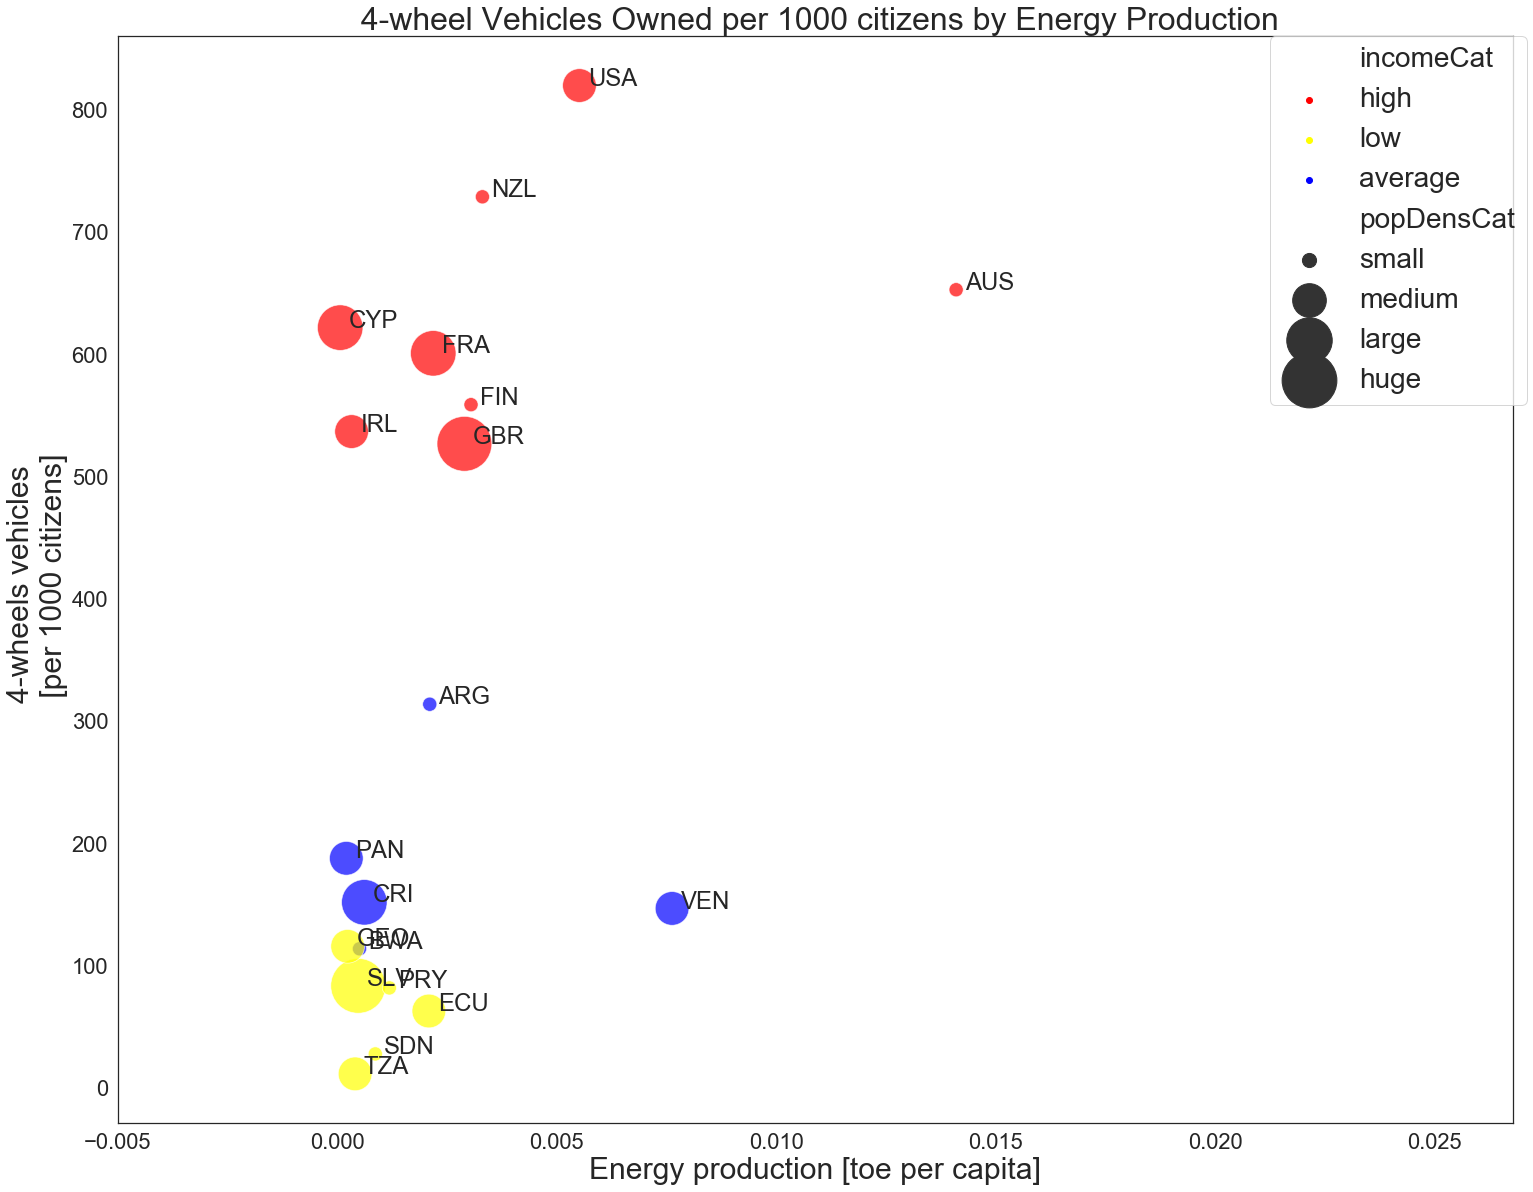

In [395]:

sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,20))
sns.set(font_scale=2,style="white")


g=sns.scatterplot(x='Eprod [toe PP]', y='carsOwnby1000',alpha=0.7, hue="incomeCat", palette=['red','yellow','blue'],              
                size='popDensCat',sizes=(3000,200),data=df_2007_sample);
g.set(xlim=(-0.005, None))
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=28)
plt.xlabel("Energy production [toe per capita]", size=30)
plt.ylabel("4-wheels vehicles \n [per 1000 citizens]", size=30)
plt.title(" 4-wheel Vehicles Owned per 1000 citizens by Energy Production", size=32);
x_shift=.0002
label_point(df_2007_sample['Eprod [toe PP]'], df_2007_sample.carsOwnby1000, df_2007_sample.countryCode, plt.gca());

### Plot 2:  4-wheel vehicles  owned per 1000 citizens by Energy production
#### Observation and findings
There is no observed trend between 4-wheels vehicles owned and energy production per citizen of a country.

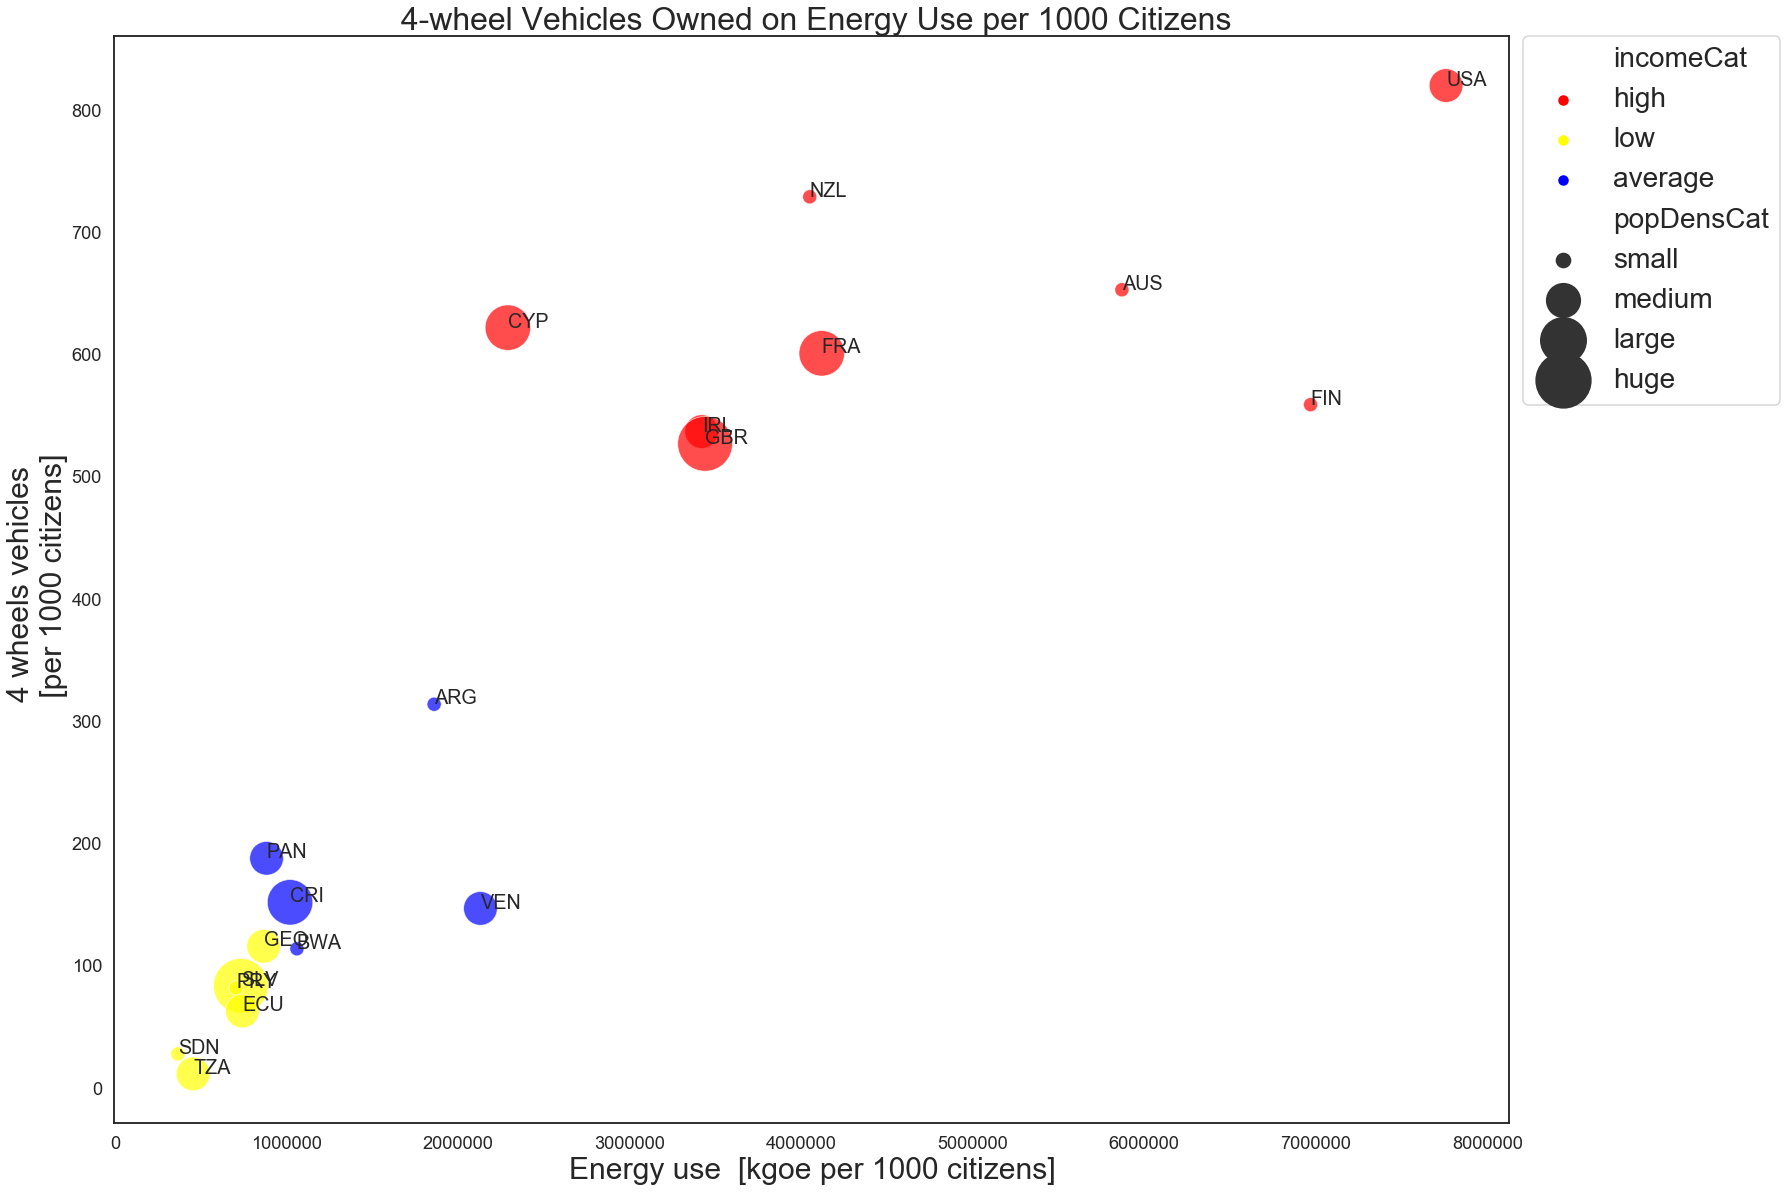

In [396]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,20))
x_01=df_2007_sample['Euse [kgoe PP]']*1000
sns.scatterplot(x=x_01, y='carsOwnby1000',alpha=0.7,hue="incomeCat", palette=['red','yellow','blue'],
                size='popDensCat',sizes=(3000,200),data=df_2007_sample);
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=28)
plt.xlabel("Energy use  [kgoe per 1000 citizens]", size=30)
plt.ylabel("4 wheels vehicles \n [per 1000 citizens]", size=30)
plt.title(" 4-wheel Vehicles Owned on Energy Use per 1000 Citizens", size=32);
x_shift=.02
label_point(x_01, df_2007_sample.carsOwnby1000, df_2007_sample.countryCode, plt.gca());

### Plot 3: 4-wheel vehicles Owned on Energy Use per 1000 Citizens
#### Observations and findings
Citizens in countries with high energy use (>0.5 kgoe per 1000 citizens) own in general more 4-wheels vehicles. There is a linear dependency between two variables with many outliers.

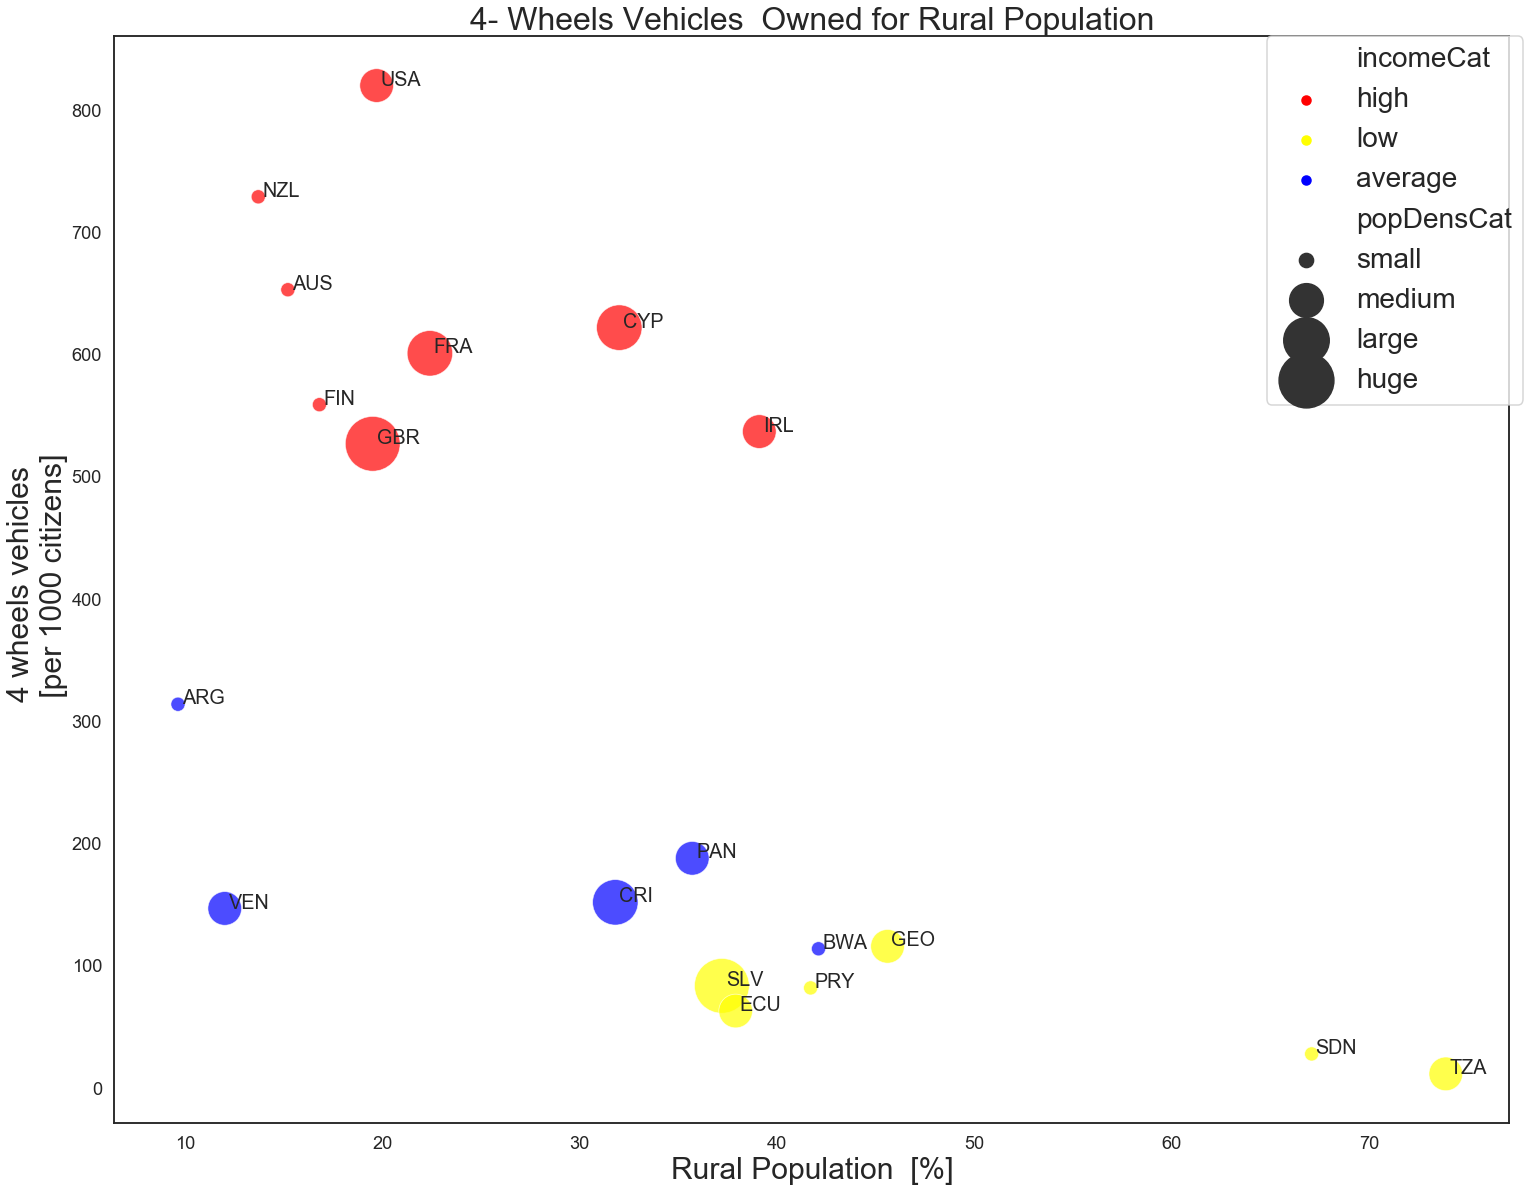

In [397]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,20))
x_01=df_2007_sample['rural [%]']
sns.scatterplot(x=x_01, y='carsOwnby1000',alpha=0.7,hue="incomeCat", palette=['red','yellow','blue'],
                size='popDensCat',sizes=(3000,200),data=df_2007_sample);
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=28)
plt.xlabel("Rural Population  [%]", size=30)
plt.ylabel("4 wheels vehicles \n [per 1000 citizens]", size=30)
plt.title("4- Wheels Vehicles  Owned for Rural Population", size=32);
x_shift=.2
label_point(x_01, df_2007_sample.carsOwnby1000, df_2007_sample.countryCode, plt.gca());

### Plot 4: 4- wheels Vehicles Owned by Percentage og Rural Population
#### Observations and findings
There is a decrease in 4 wheels vehicles owned per 1000 citizens by increase in rural population. We can see also that countries with a low GDP/capita have higher percentage of the rural population.

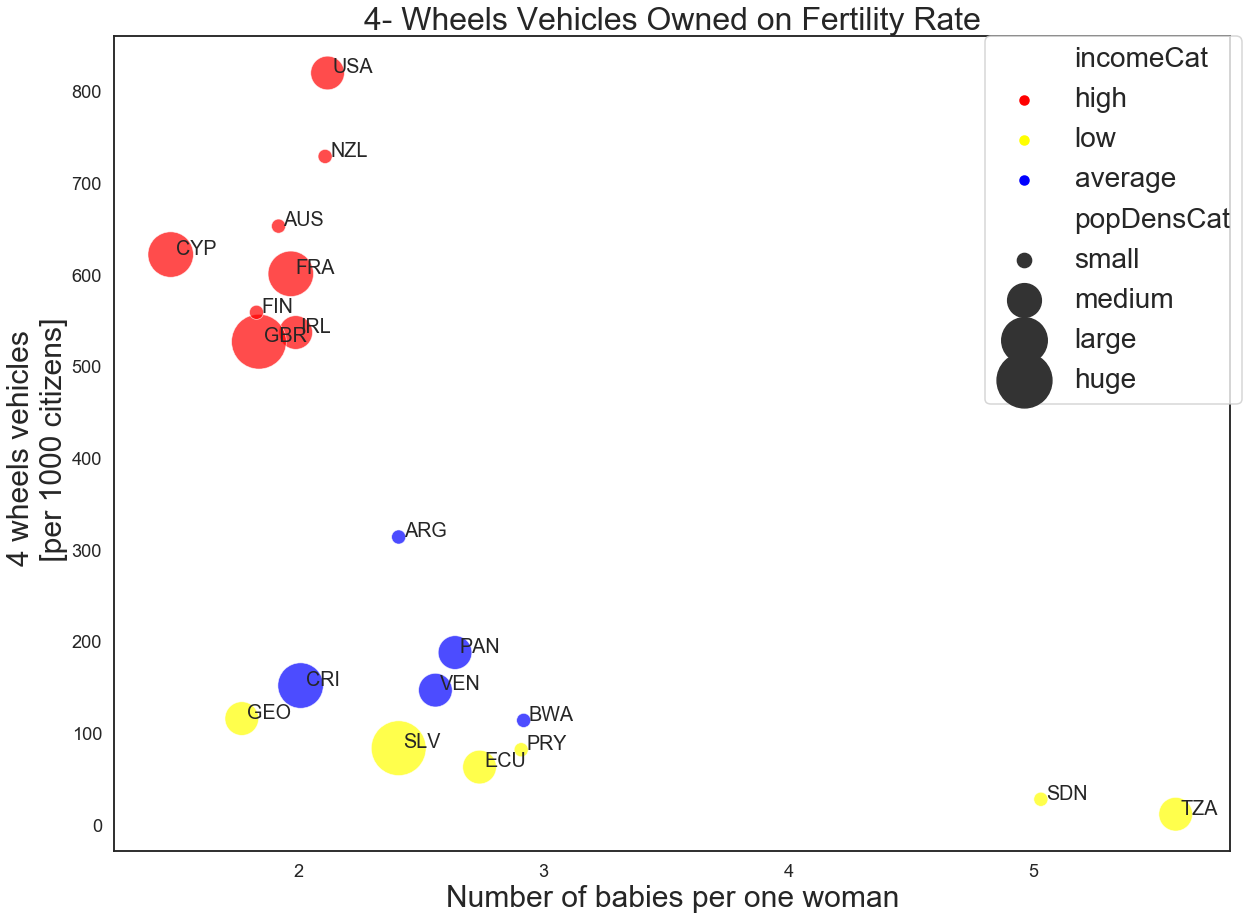

In [398]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(20,15))
x_01=df_2007_sample['fertilityRate']
sns.scatterplot(x=x_01, y='carsOwnby1000',alpha=0.7,hue="incomeCat", palette=['red','yellow','blue'],
                size='popDensCat',sizes=(3000,200),data=df_2007_sample);
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=28)
plt.xlabel("Number of babies per one woman", size=30)
plt.ylabel("4 wheels vehicles \n [per 1000 citizens]", size=30)
plt.title("4- Wheels Vehicles Owned on Fertility Rate", size=32);
x_shift=.02
label_point(x_01, df_2007_sample.carsOwnby1000, df_2007_sample.countryCode, plt.gca());

### Plot 5: 4- wheels Vehicles Owned by the average woman fertility in a country
#### Observation
Number of 4 wheels vehicles per 1000 citizens decreases exponentially by the average fertility rate in a country.

 ## <font color ="blue">**CO$_{2}$** emissions </font>

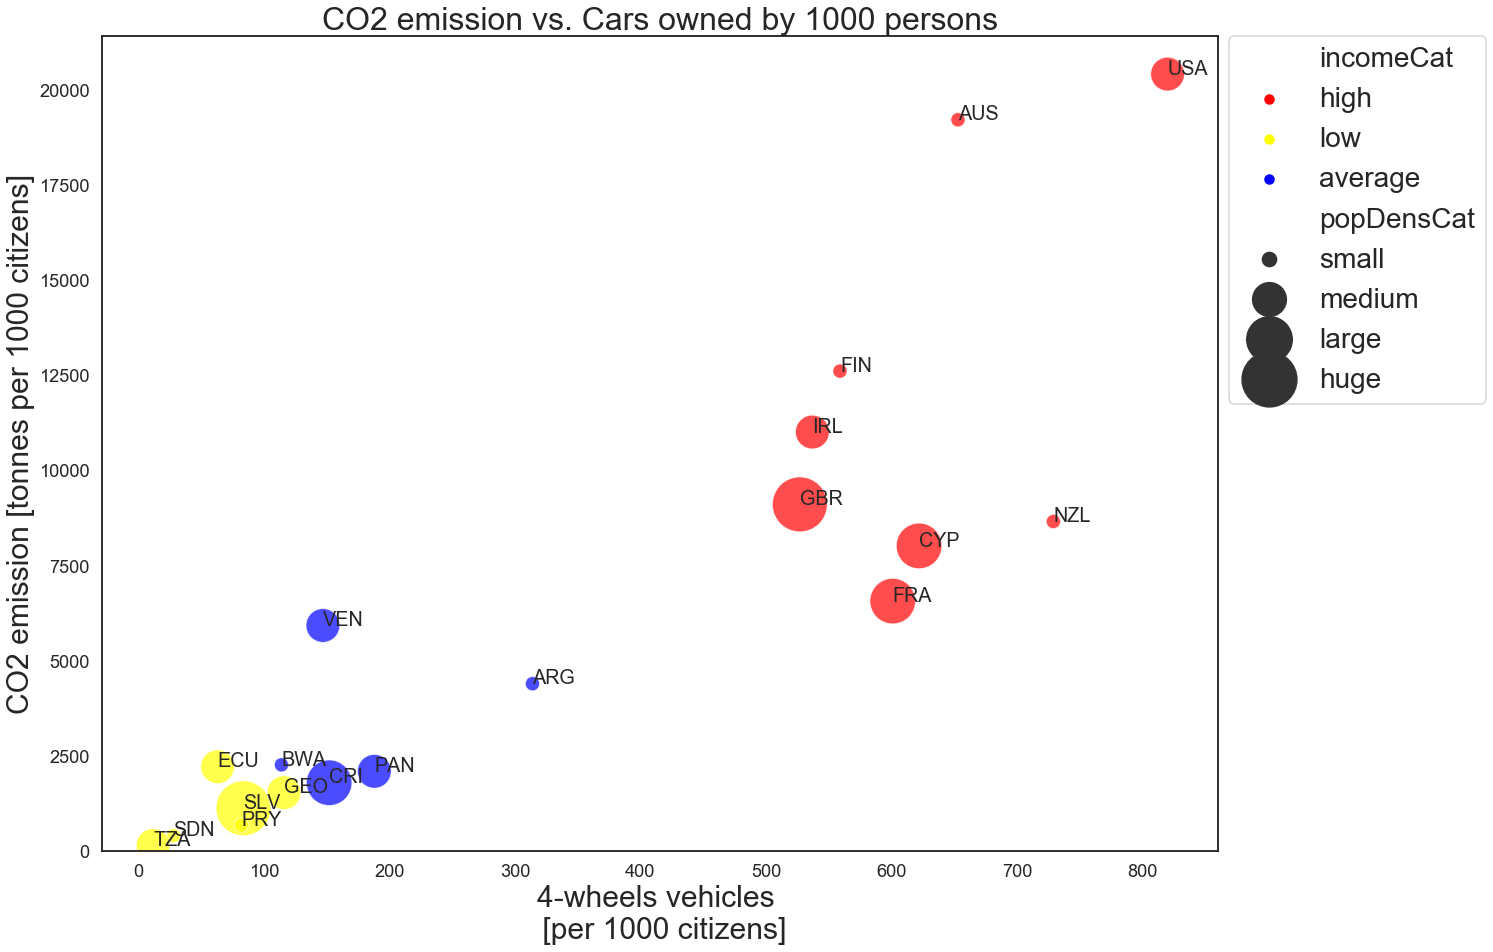

In [399]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(20,15))
y1_CO2=df_2007_sample['CO2 [t PP]']*1000
g=sns.scatterplot(x='carsOwnby1000', y=y1_CO2, alpha=0.7,hue="incomeCat", palette=['red','yellow','blue'],size='popDensCat',sizes=(3000,200),data=df_2007_sample);
g.set(ylim=(-0.005, None))
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, fontsize=28)
plt.ylabel("CO2 emission [tonnes per 1000 citizens]", size=30)
plt.xlabel("4-wheels vehicles \n [per 1000 citizens]", size=30)
plt.title("CO2 emission vs. Cars owned by 1000 persons", size=32);
x_shift=.02
label_point(df_2007_sample.carsOwnby1000,df_2007_sample['CO2 [t PP]']*1000, df_2007_sample.countryCode, plt.gca());


### Plot 6: CO$_2$ emission increasedue to the 4-wheels vehicles
#### Observation
There is a linear trend for CO2 emissions by number of 4-wheels vehicles (per 1000 citizens) with many outliers.

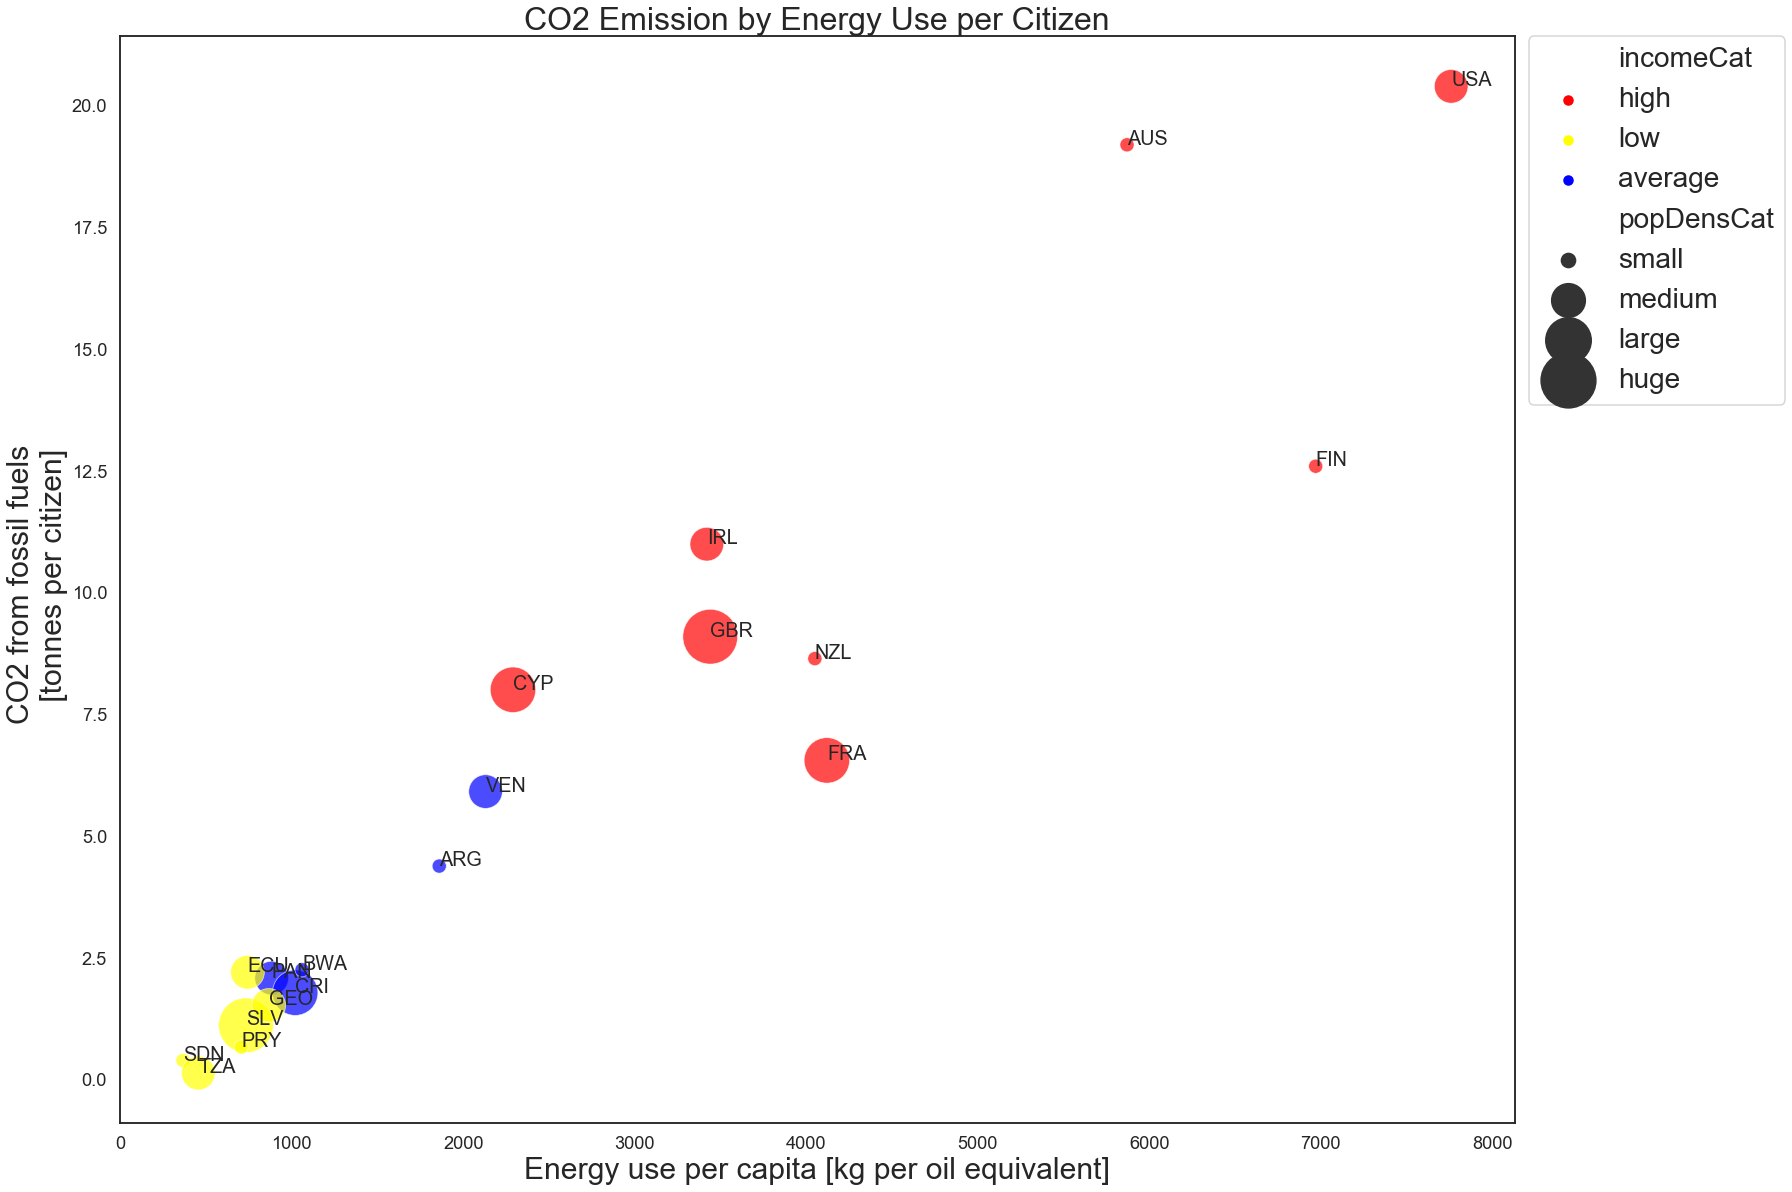

In [400]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,20))

sns.scatterplot(x='Euse [kgoe PP]', y='CO2 [t PP]',alpha=0.7,hue="incomeCat", palette=['red','yellow','blue'],
                size='popDensCat',sizes=(3000,200),data=df_2007_sample);
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=28)
plt.xlabel("Energy use per capita [kg per oil equivalent]", size=30)
plt.ylabel("CO2 from fossil fuels \n [tonnes per citizen]", size=30)
plt.title("CO2 Emission by Energy Use per Citizen", size=32);
x_shift=.2
label_point(df_2007_sample['Euse [kgoe PP]'], df_2007_sample['CO2 [t PP]'], df_2007_sample.countryCode, plt.gca());


### Plot 6: CO$_2$ emission increase by the energy use 
#### Observation
There is a significant correlation between Enery use \[kg per oil equivalent\] and CO2 from fossil fuels \[tonnes per citizen\]. This means the primary energy sources for a citizen are fossil fuels. 

The outlier is Iceland with geothermal energy.

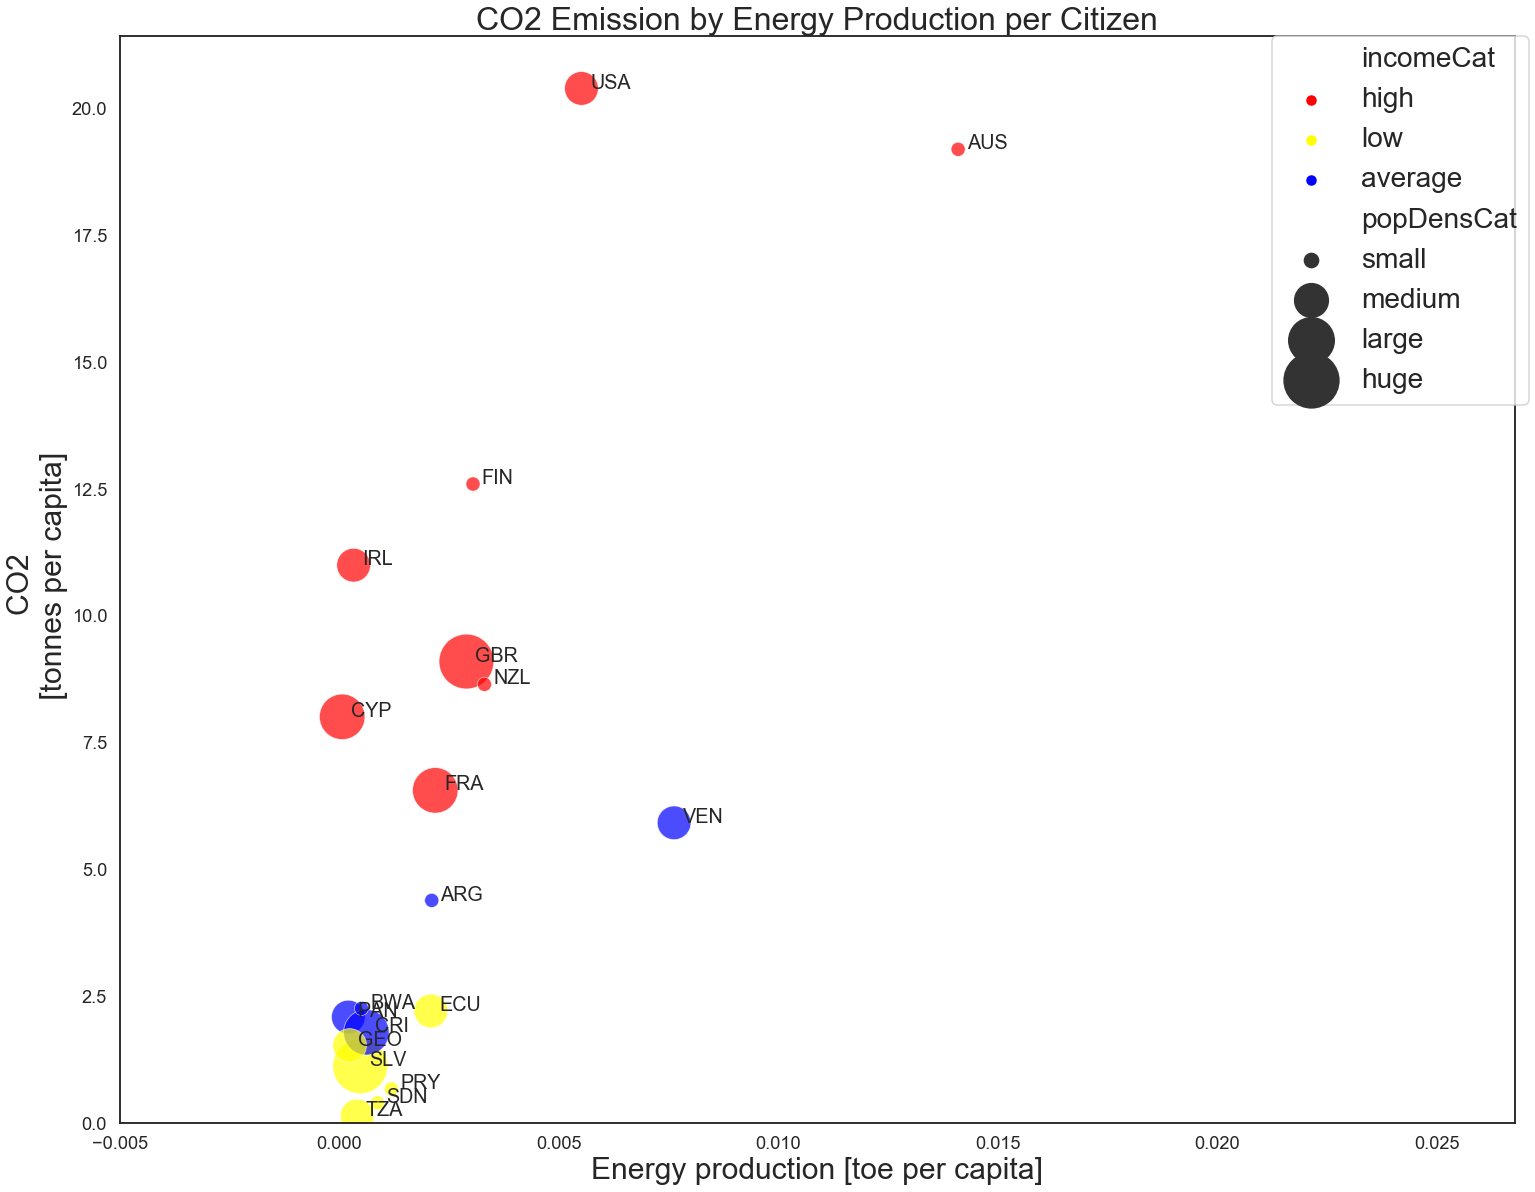

In [401]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,20))
g=sns.scatterplot(x='Eprod [toe PP]', y='CO2 [t PP]',alpha=0.7,hue="incomeCat", palette=['red','yellow','blue'],
                size='popDensCat',sizes=(3000,200),data=df_2007_sample);
g.set(ylim=(-0.005, None))
g.set(xlim=(-0.005, None))
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=28)
plt.xlabel("Energy production [toe per capita]", size=30)
plt.ylabel("CO2 \n [tonnes per capita]", size=30)
plt.title("CO2 Emission by Energy Production per Citizen", size=32);
x_shift=.0002
label_point(df_2007_sample['Eprod [toe PP]'], df_2007_sample['CO2 [t PP]'], df_2007_sample.countryCode, plt.gca());


### Plot 7: CO$_2$ emission increase by the energy production
#### Observation
Countries with high energy production per capita have in general higher level of CO2 emissions. There is a linear dependence between country energy production per capita and tonnes of CO2 per capita. There is a weak positive correlation between CO2 emissions and energy production (per capita). 

One can say that Norway uses modern technologies with energy production, and therefore has lower CO2 emissions compare to other countries with similar energy production.

### <font color="blue">Comparison of the countries in Middle Europe by 4 wheel vehicles owned and GDP</font>

Are the most important conclusions from the previous section valid for the sample of countries in Middle Europe?

Function for normalizing color palette. Source: https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot

In [402]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

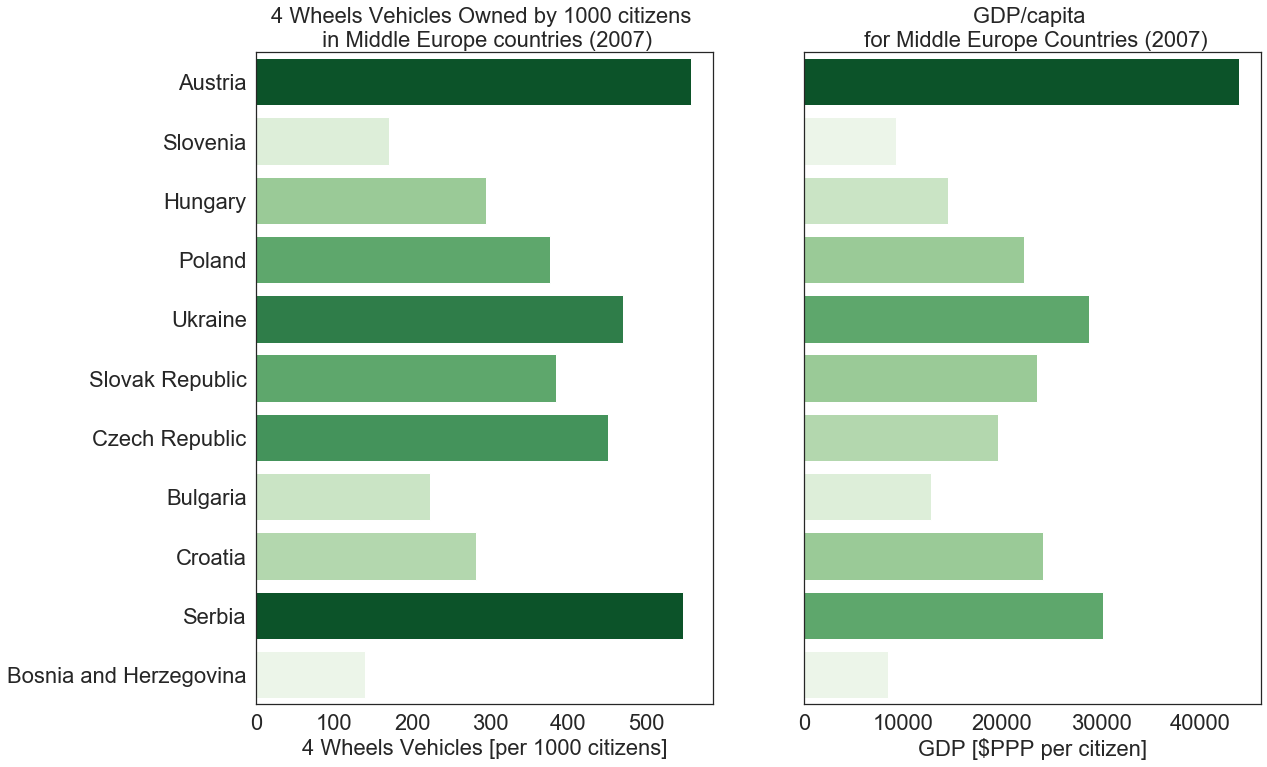

In [403]:
sns.set(font_scale=2,style="white")
x01=['Austria','Slovenia','Hungary','Poland','Ukraine','Slovak Republic','Czech Republic','Bulgaria','Croatia','Serbia','Bosnia and Herzegovina']
y01=df_cars[df_cars['country'].isin(x01)]
xlabels=x01
y02=income[income['country'].isin(x01)]

fig, axes = plt.subplots(1, 2, figsize=(18, 12), sharey=True)

#Cars owned per 1000 citizens
g0=sns.barplot(ax=axes[0], x=y01['2007'], y=x01, palette=colors_from_values(y01['2007'], "Greens"));
axes[0].set_xlabel('4 Wheels Vehicles [per 1000 citizens]', fontsize=22);
axes[0].set_title('4 Wheels Vehicles Owned by 1000 citizens \n in Middle Europe countries (2007)', fontsize=22);

#Income
g1=sns.barplot(ax=axes[1], x=y02['2007'], y=x01, palette=colors_from_values(y02['2007'], "Greens"));
axes[1].set_xlabel('GDP [$PPP per citizen]', fontsize=22);
axes[1].set_title('GDP/capita \n for Middle Europe Countries (2007)', fontsize=22);


### Plot 8: Comparison of the countries in Middle Europe by 4 wheel vehicles owned and GDP
#### Observation and findings
Also in this local sample (Middle Europe GDP/capita) we can see that citizens in countries with higher GDP/capita own more cars. 

### Comparison of the countries in Middle Europe by CO2 emissions,  energy use and energy production in 2007

Are conclusions from the previous section valid for the sample of countries in Middle Europe?

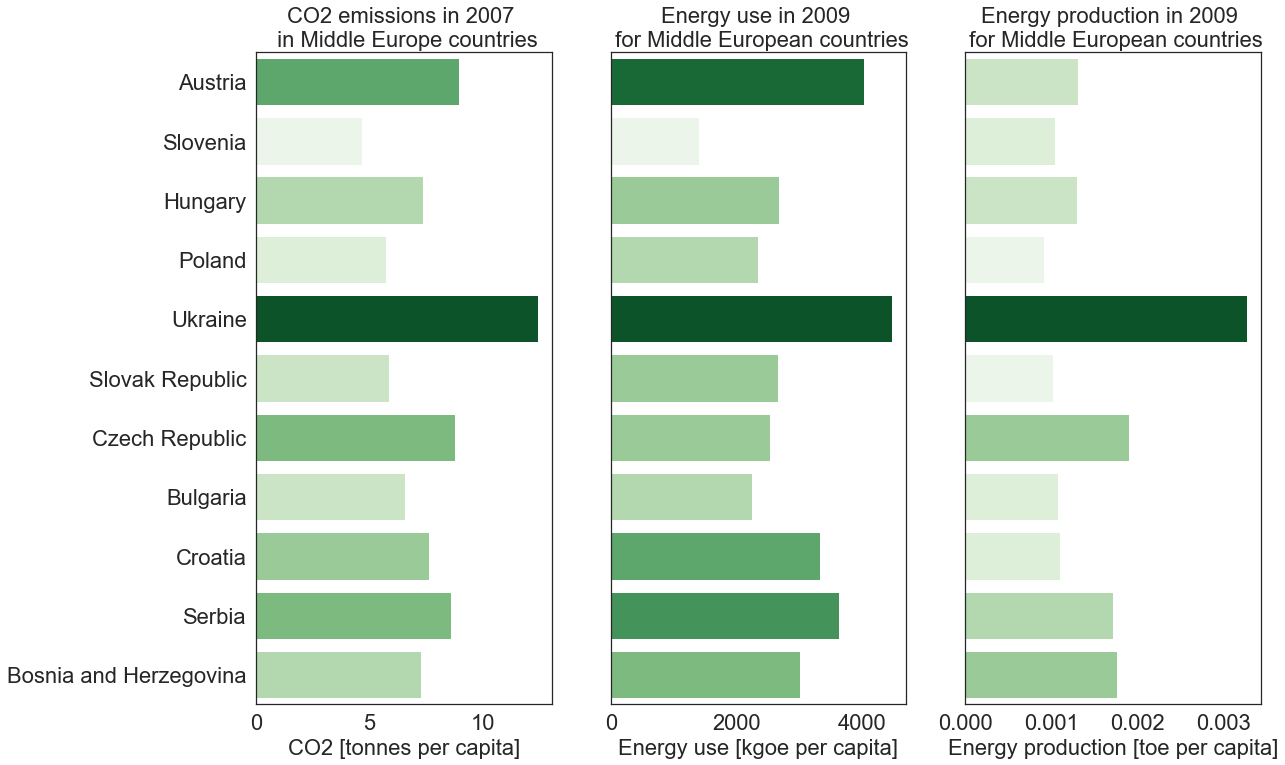

In [404]:
sns.set(font_scale=2,style="white")
y01=CO2[CO2['country'].isin(x01)]
y02=Euse[Euse['country'].isin(x01)]
y03=Eprod[Eprod['country'].isin(x01)]

fig, axes = plt.subplots(1, 3, figsize=(18, 12), sharey=True)

#CO2 emissions
g0=sns.barplot(ax=axes[0], x=y01['2007'], y=x01, palette=colors_from_values(y01['2007'], "Greens"));
axes[0].set_xlabel('CO2 [tonnes per capita]', fontsize=22);
axes[0].set_title('CO2 emissions in 2007 \n in Middle Europe countries', fontsize=22);

#Energy Use
g1=sns.barplot(ax=axes[1], x=y02['2007'], y=x01, palette=colors_from_values(y02['2007'], "Greens"));
axes[1].set_xlabel('Energy use [kgoe per capita]', fontsize=22);
axes[1].set_title('Energy use in 2009 \n for Middle European countries', fontsize=22);

#Energy Production
g2=sns.barplot(ax=axes[2], x=y03['2007'], y=x01, palette=colors_from_values(y03['2007'], "Greens"));
axes[2].set_xlabel('Energy production [toe per capita]', fontsize=22);
axes[2].set_title('Energy production in 2009 \n for Middle European countries', fontsize=22);


### Plot 9: Comparison of the countries in Middle Europe by CO2 emissions,  energy use and energy production in                          the year 2007
#### Observation
One can see there is a significant correlation between Energy used/capita and CO2 emissions/capita. We can say there is some proportionality between energy produced and CO2 emissions in some of the countries, but there is no strong correlation between these variables.

<a id='conclusions'></a>
## <font color="blue"> Conclusions </font>
#### Results: Our data suggest that

<ul>
   <li>
        Citizens in countries with the higher GDP/capita own more 4-wheels vehicles than countries with lower GDP/capita.
        </li>
    <li>
        Citizens in countries with higher Energy use per capita have in general more 4-wheels vehicles  than countries with lower Energy use per capita.
        </li>
    <li>
         There is no significant linear correlation between Energy production and number of 4-wheels vehicles owned  per 1000 citizens. 
        </li> 
     <li>
         Countries with  more than 50% rural populations have less than 200 4-wheels vehicles per 1000 persons. Singapore with 0% and Greece with 25% of rural population are outliers here, the proportion of citizens with a 4-wheel vehicle is less than 20%.
        </li> 
     <li>
         In countries with the average fertility rate per woman higher than 4, own less than 10% of citizens a 4-wheels vehicle.
     <li>
        There is a linear increase for CO2 emissions by number of  4-wheels vehicles owned per 1000 citizens. 
        </li>   
     <li>
        There is a strong positive linear correlation between CO2 emissions per capita and Energy used per capita.
        </li>
    <li>
        My findings above apply also locally on Middle Europe countries.
        </li>

  
 </ul>  

#### Limitations of finded results: 

<ul>
   <li>
Findings are based on visual interpretation of the data.
    </li>
    <li>
Findings in this project missing proper statistics description.        
</li>
    <li>
         There are used a limited sample of all countries worldwide in data analysis. This limited sample has no Gaussian distributions in variables (GDP/capita, 4 wheels vehicles owned, energy production..)
        </li> 
     <li>
        There could be other factors important in this study, f.e. the cost of the insurance and service of a 4 wheels vehicle in a country, the number of parking places. 
        </li>   
</ul>  